### **Libraries**

In [ ]:
import gc
import warnings
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc

from scipy import stats

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering

%matplotlib inline
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Consider the wine dataset**

In [ ]:
from sklearn.datasets import load_wine

wine_data = load_wine()
wine_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
df = pd.DataFrame(wine_data.data)
df.columns = wine_data.feature_names
df["target"] = wine_data.target

In [ ]:
pd.set_option("display.max_columns", df.shape[1])

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### **Check if any nulls are present in the dataset**


In [ ]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

### **Perform Outlier Analysis for features and justify reasons if outliers are detected in features.**


In [ ]:
outlier_X = df.drop("target", axis=1)

In [ ]:
# at 95 % significance
def is_normal(x, cols, treshhold = 0.05):
    k2, p = stats.normaltest(x)
    return {"p-value": p, "significance": p > treshhold, "column": cols}

for cols in outlier_X.columns:
    print(is_normal(np.array(outlier_X[cols]), cols))

{'p-value': 0.00034163202531285264, 'significance': False, 'column': 'alcohol'}
{'p-value': 3.1742168603714762e-06, 'significance': False, 'column': 'malic_acid'}
{'p-value': 0.03631602067034469, 'significance': False, 'column': 'ash'}
{'p-value': 0.21004273588925534, 'significance': True, 'column': 'alcalinity_of_ash'}
{'p-value': 4.658884716268434e-09, 'significance': False, 'column': 'magnesium'}
{'p-value': 0.0005556667174637149, 'significance': False, 'column': 'total_phenols'}
{'p-value': 0.00012693297763919295, 'significance': False, 'column': 'flavanoids'}
{'p-value': 0.0026647025727076653, 'significance': False, 'column': 'nonflavanoid_phenols'}
{'p-value': 0.008000813483971013, 'significance': False, 'column': 'proanthocyanins'}
{'p-value': 5.31947611640046e-05, 'significance': False, 'column': 'color_intensity'}
{'p-value': 0.594729042205703, 'significance': True, 'column': 'hue'}
{'p-value': 4.8789809118220485e-11, 'significance': False, 'column': 'od280/od315_of_diluted_wi

Hue and alcalinity_of_ash have outliers present based on p-value

In [ ]:
mod_df = df.drop(["alcalinity_of_ash", "hue"], axis=1)

In [ ]:
mod_df.head()

,alcohol,malic_acid,ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,127.0,2.80,3.06,0.28,2.29,5.64,3.92,1065.0,0
1,13.20,1.78,2.14,100.0,2.65,2.76,0.26,1.28,4.38,3.40,1050.0,0
2,13.16,2.36,2.67,101.0,2.80,3.24,0.30,2.81,5.68,3.17,1185.0,0
3,14.37,1.95,2.50,113.0,3.85,3.49,0.24,2.18,7.80,3.45,1480.0,0
4,13.24,2.59,2.87,118.0,2.80,2.69,0.39,1.82,4.32,2.93,735.0,0


### **Perform Univariate Analysis of numerical features**


In [ ]:
X = mod_df.drop("target", axis=1)

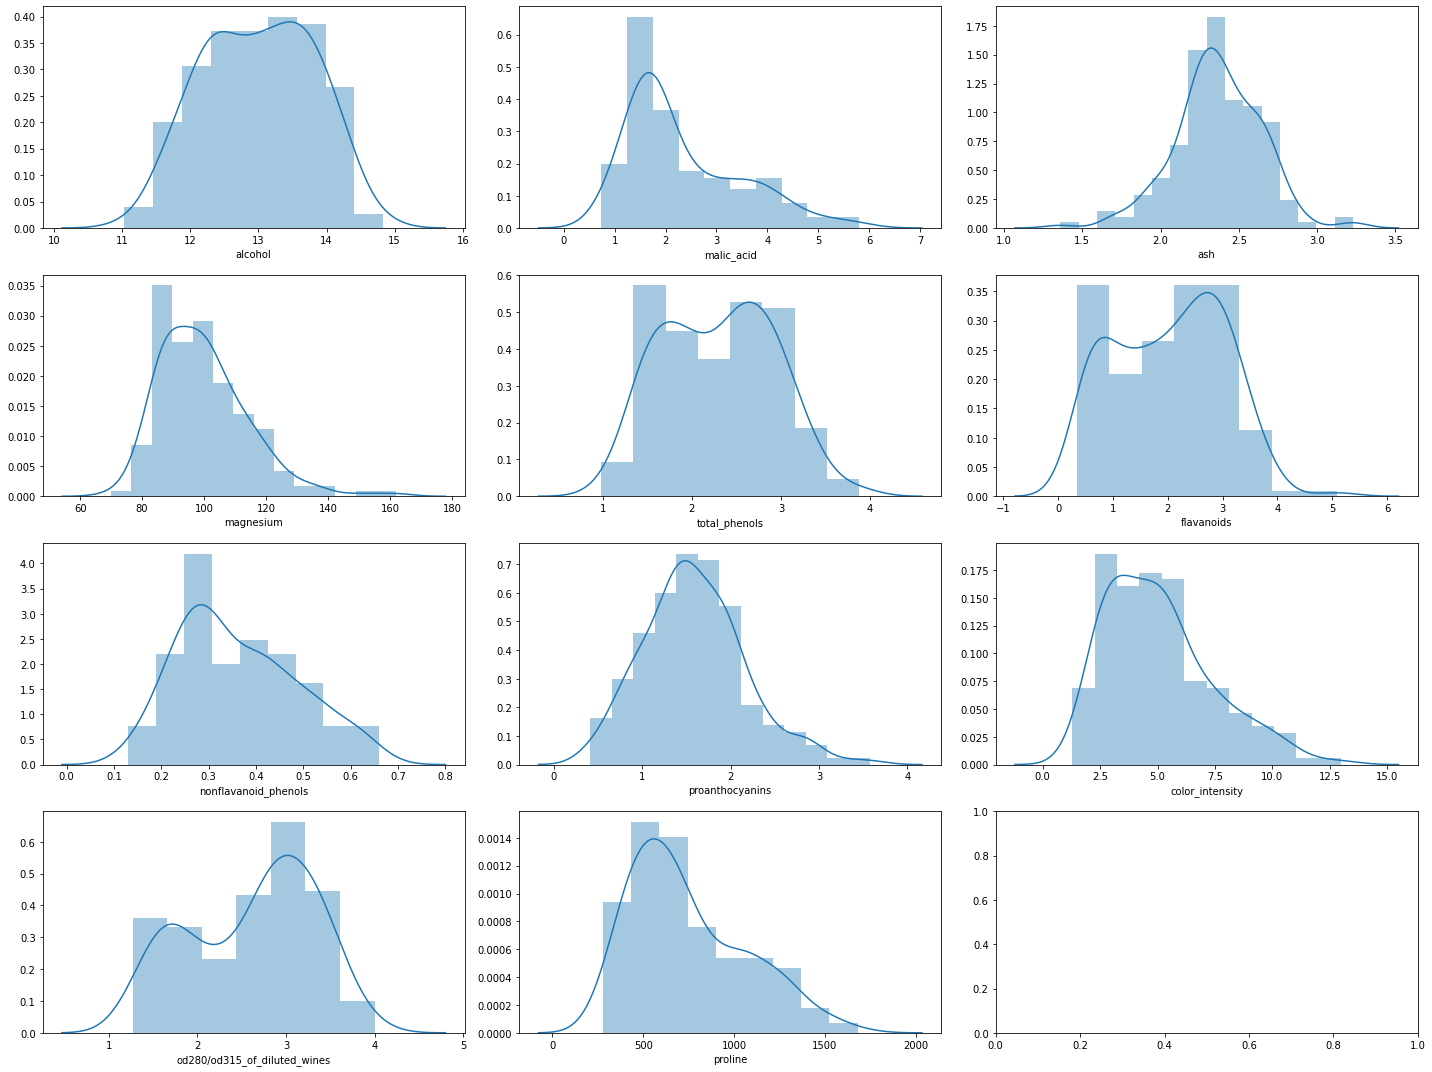

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(20, 15))
index = 0
ax = ax.flatten()
for col in X.columns:
    sns.distplot(X[col], ax=ax[index])
    index += 1
plt.tight_layout()

# Most of the data seems to be normally distributed

### **Perform bi-variate analysis of 2-3 features**

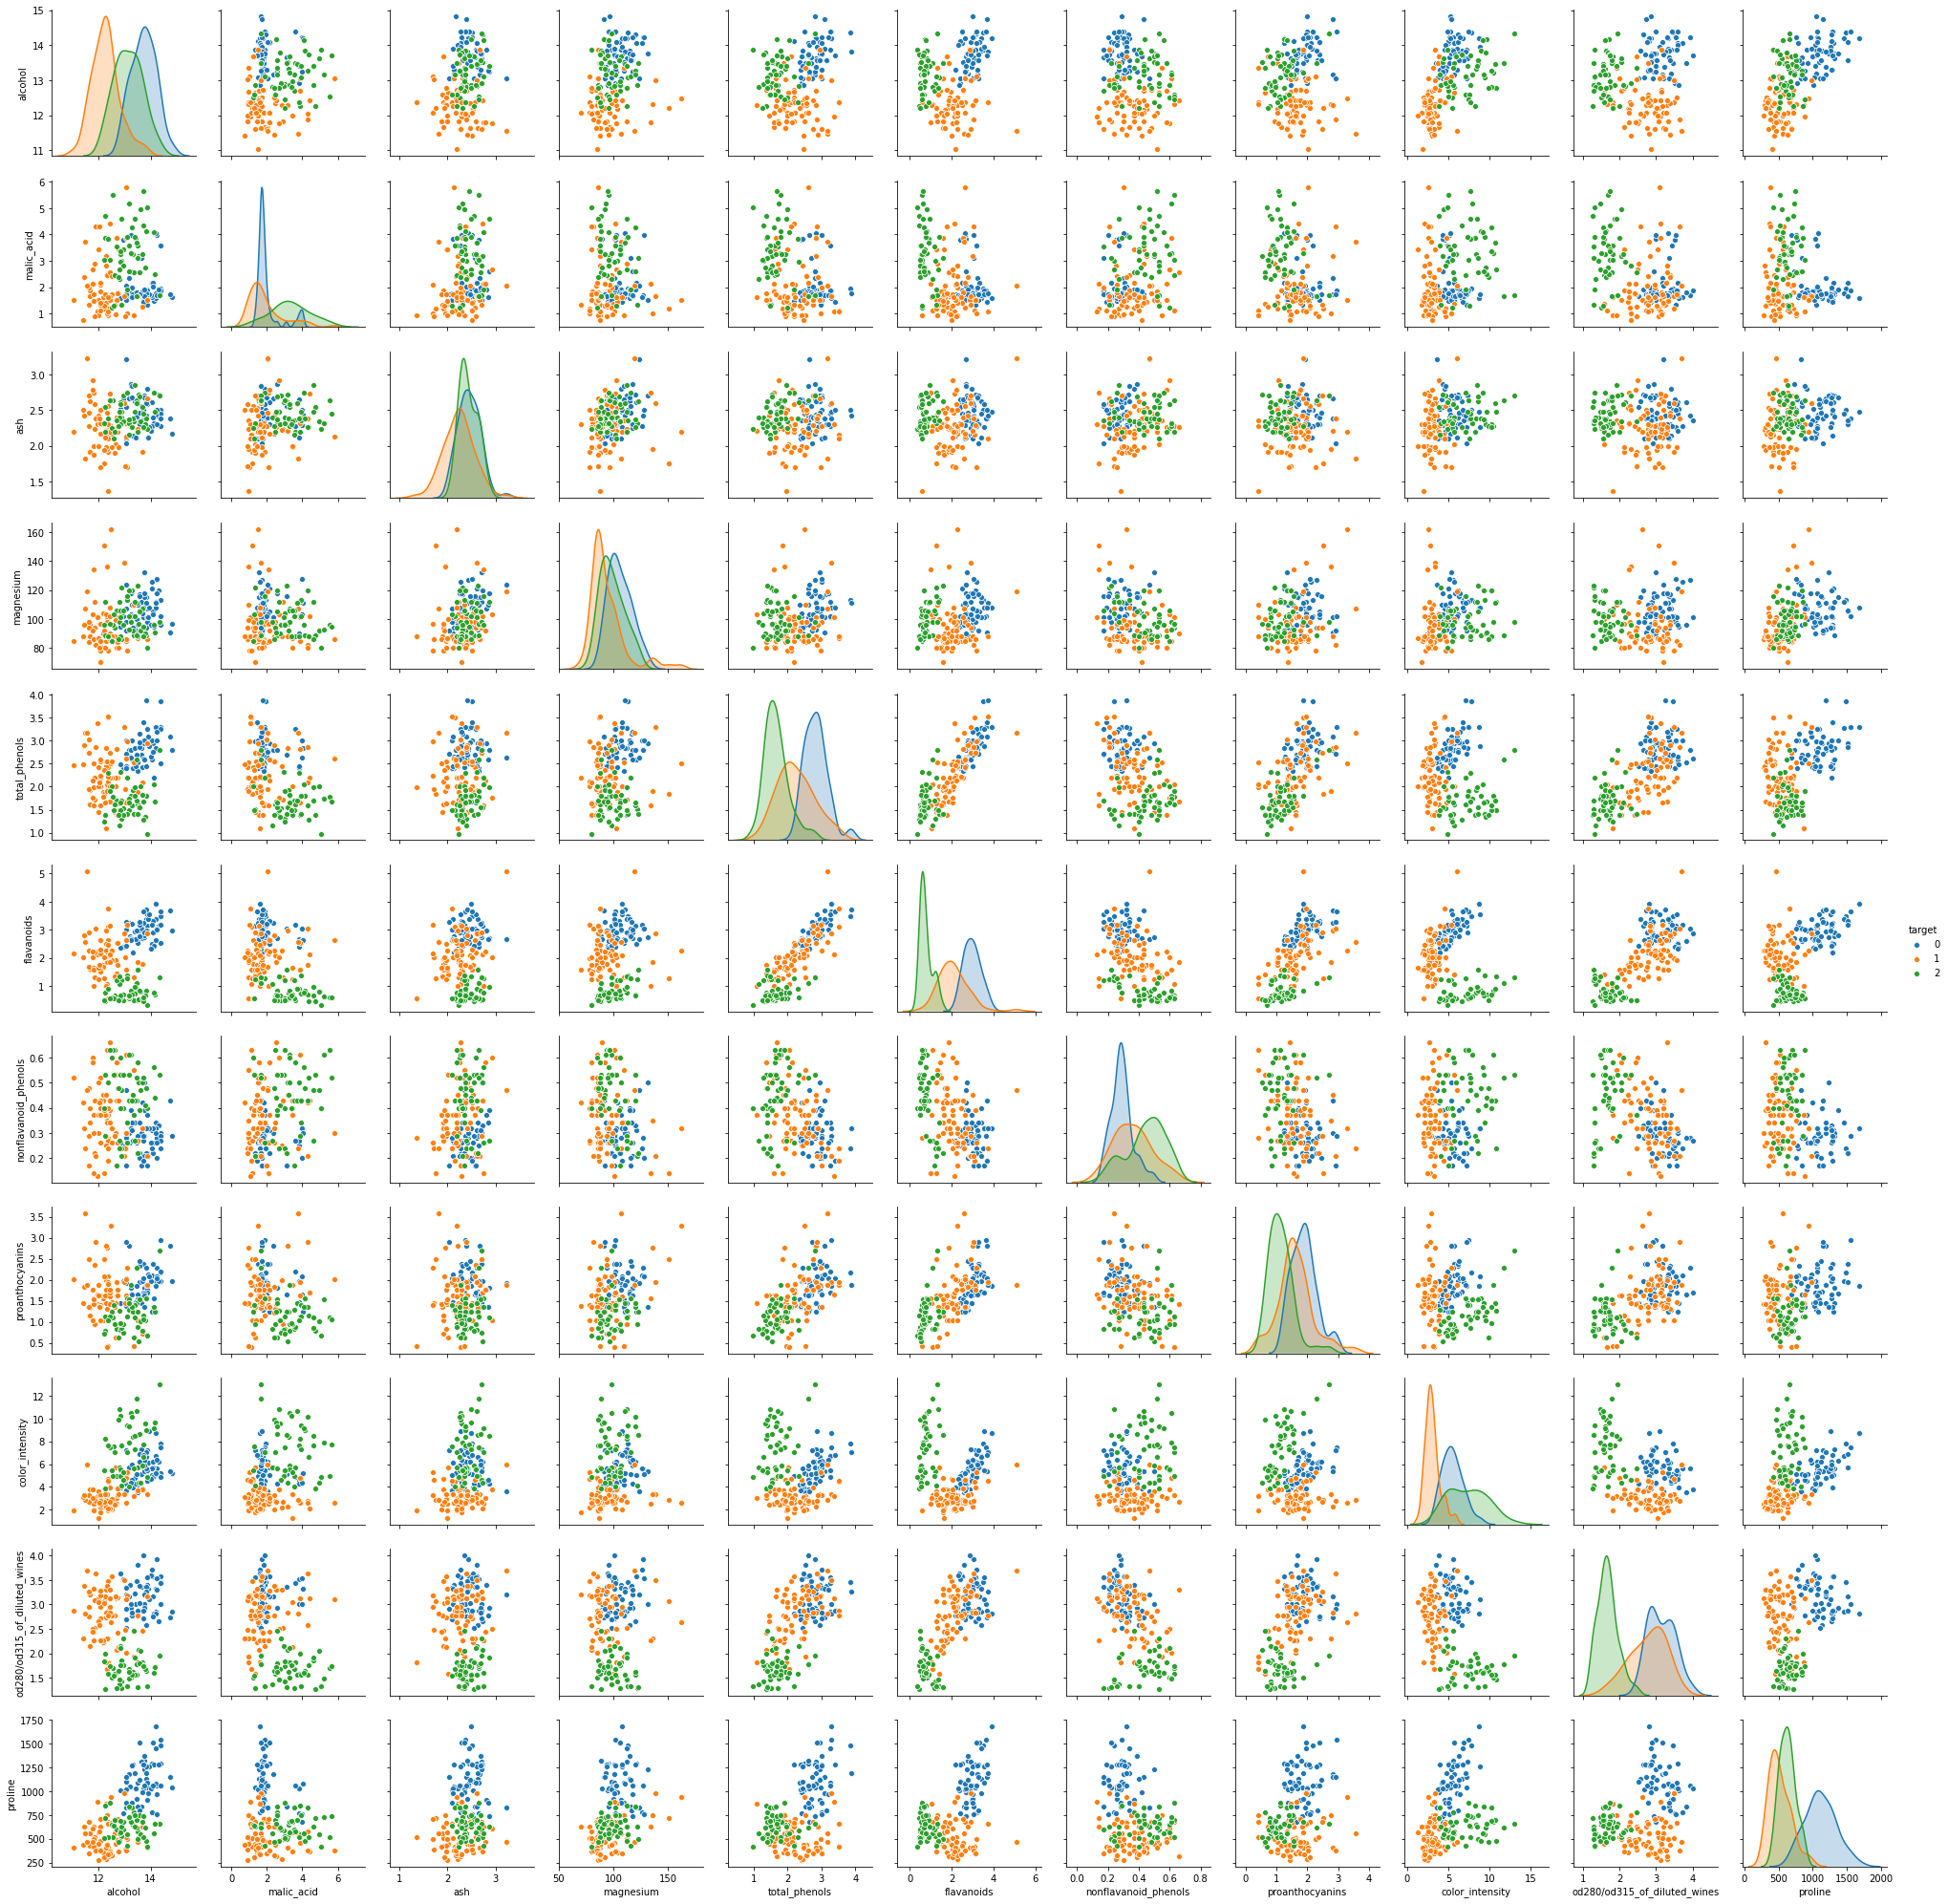

In [ ]:
sns.pairplot(mod_df.iloc[:,[i for i in range(len(mod_df.columns))]], size = 2.5, hue="target")
plt.show()

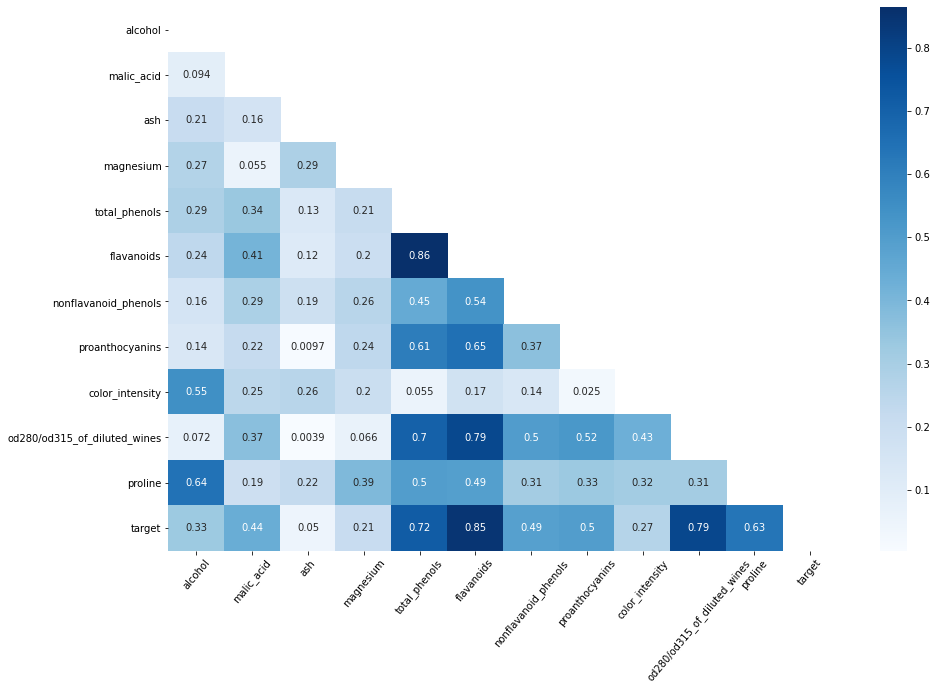

In [ ]:
df_corr = mod_df.corr().abs()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
  df_corr,
  cmap="Blues",
  mask=mask,
  xticklabels=df_corr.columns.values,
  yticklabels=df_corr.columns.values,
  annot=True,
  ax=ax
)
ax.set_xticklabels(mod_df.columns, rotation=50)
plt.show()

### **Normalize features using MinMaxScaler**

In [ ]:
mod_X = mod_df.drop("target", axis=1)
mod_Y = mod_df["target"]

In [ ]:
scaler = MinMaxScaler()
mod_X = scaler.fit_transform(mod_X)

### **In K-Means, plot the elbow method showing the minimum k to be choosen.**

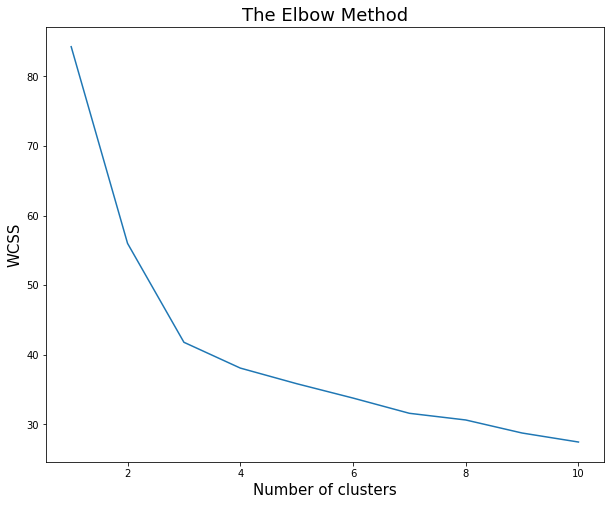

In [ ]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(mod_X)
    wcss.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(range(1,11), wcss)
ax.set_title("The Elbow Method", fontsize=18)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("WCSS", fontsize=15)
plt.show()

### **Also, use Silhouette analysis to prove minimum k needed to build clusters**

**Silhouette Analysis**

Silhouette Analysis is a way to measure how close each point in a cluster is to the points in its neighbouring clusters. It is a neat way to find out the optimum value for "K" during k-Meand Clustering. Silhouette values lie in the range [-1,1]. A value of +1 indicates that the sample is far away from its neighboring cluster and very close to the cluster it's assigned. Similarly, value of -1 indicates that the point is close to its neighboring cluster than the cluster it is assigned. A value of 0 means it's at the boundary of the distance between the two cluster. Value of +1 is ideal and -1 is least preferred. Hence, higher the value better is the cluster configuration.

In [ ]:
n_clusters = list(range(2,5))
print("Number of clusters from 2 to 5:\n",n_clusters)

for clusters in range(2, 5):
    clusterer = KMeans(n_clusters=clusters, random_state=0)
    preds = clusterer.fit_predict(mod_X)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(mod_X, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {} ".format(clusters, score))

Number of clusters from 2 to 5:
 [2, 3, 4]
For n_clusters = 2, silhouette score is 0.30736311105724307 
For n_clusters = 3, silhouette score is 0.31043729681175114 
For n_clusters = 4, silhouette score is 0.24913415535516525 


n cluster has max score for 3, hence choosing that

### **On figuring out clusters , implement K-Means Clustering**

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(mod_X)

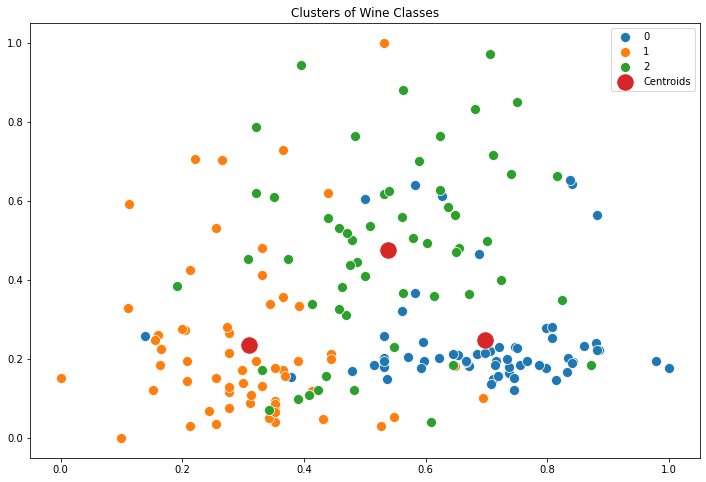

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(mod_X[y_kmeans==0,0], mod_X[y_kmeans==0,1], ax=ax, label="0", s=100)
sns.scatterplot(mod_X[y_kmeans==1,0], mod_X[y_kmeans==1,1], ax=ax, label="1", s=100)
sns.scatterplot(mod_X[y_kmeans==2,0], mod_X[y_kmeans==2,1], ax=ax, label="2", s=100)
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], ax=ax, label="Centroids", s=300)
ax.set_title("Clusters of Wine Classes")
plt.show()

### **Using Agglomerative Clustering, plot dendrograms and find out the number of clusters being formed**

**Agglomerative Hierarchical Clustering**

Hierarchical clustering algorithms fall into 2 categories:- top-down or bottom-up.

Bottom-up algorithms treat each data point as a single cluster at the outset and then successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster that contains all data points. Hence, it is called "Hierarchical Agglomerative Clustering". This hierarchy of clusters is represented as a tree(or dendogram).



**Advantages of Agglomerative Hierarcichal Clustering**

It does not require us to specify the number of clusters and we can select which number of clusters looks best while building a tree.

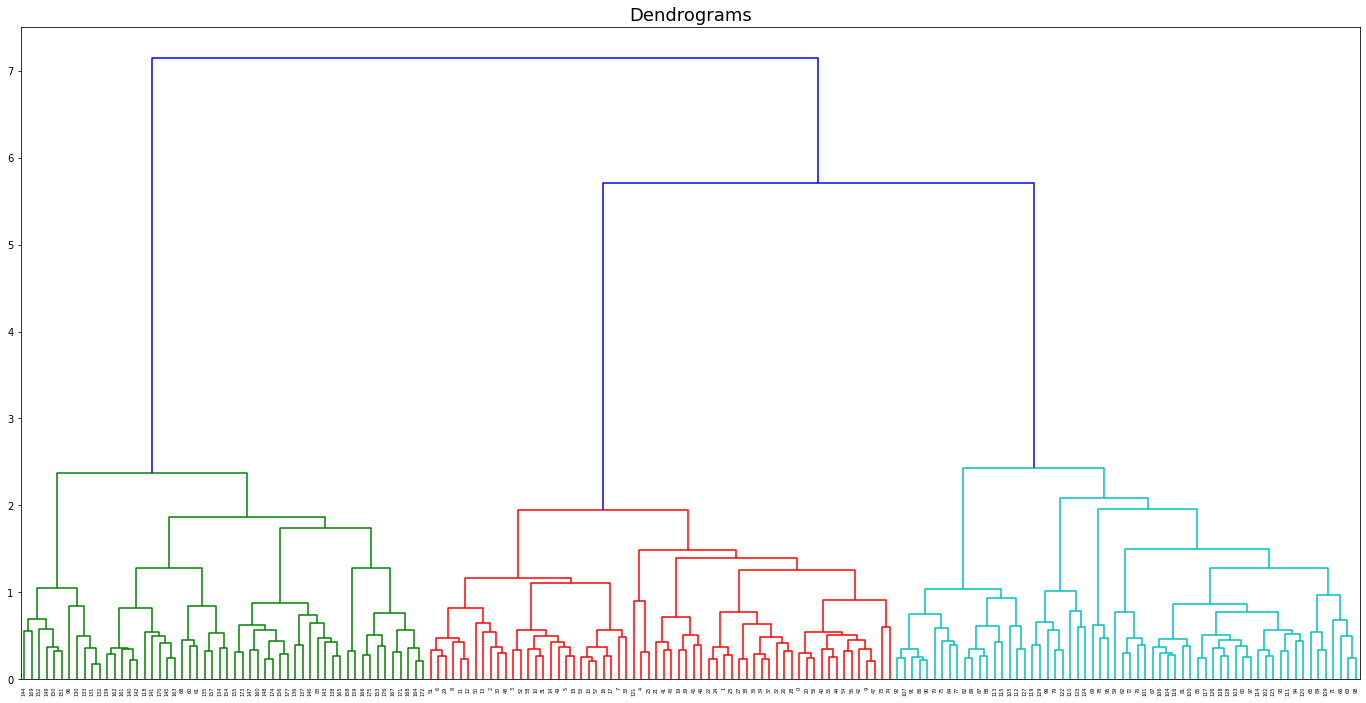

In [ ]:
plt.figure(figsize=(24,12))
plt.title("Dendrograms", fontsize=18)
dend = shc.dendrogram(shc.linkage(mod_X, method='ward'))

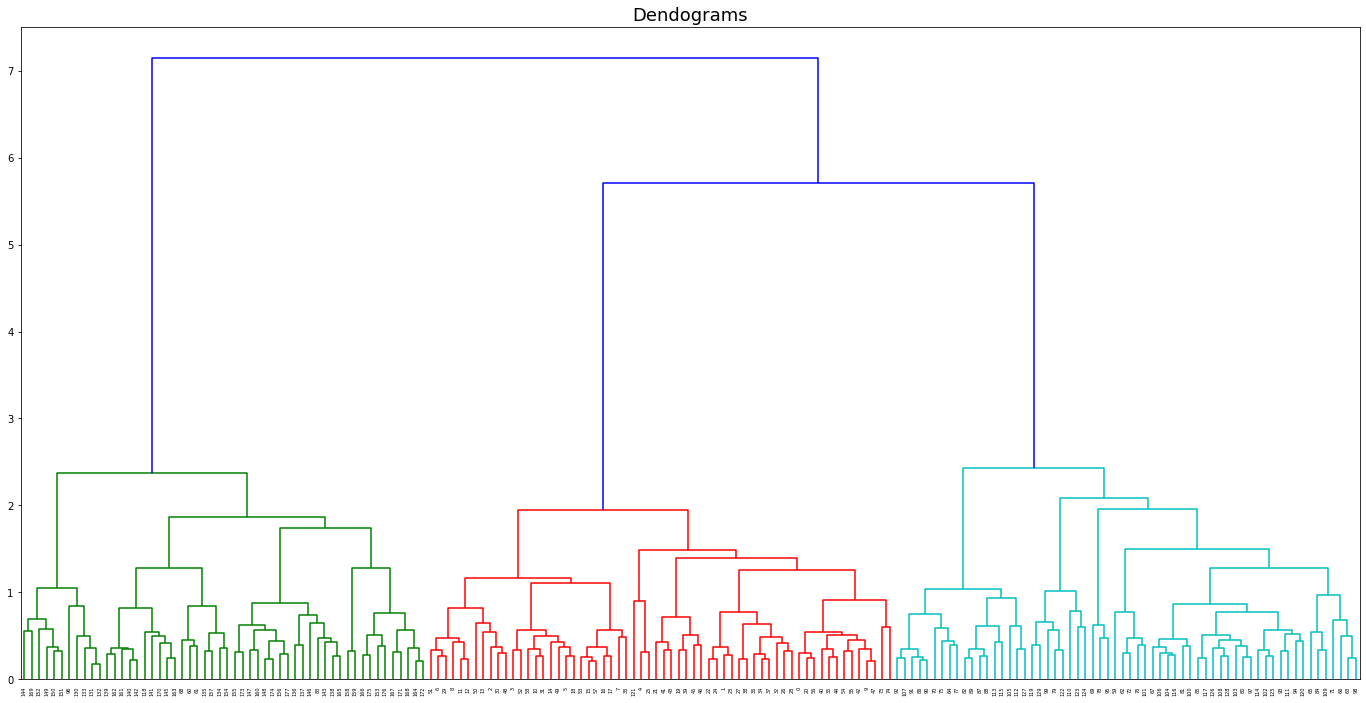

In [ ]:
plt.figure(figsize=(24,12))
plt.title("Dendograms",fontsize=18)
dend = shc.dendrogram(shc.linkage(mod_X, method='ward'))
plt.axhline(y=1250000, color='r', linestyle='--')
plt.show()

In [ ]:
Agg_Clust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage="ward")
clust_labels = Agg_Clust.fit_predict(mod_X)

### **Plot the clusters based on Agglomerative Clustering**

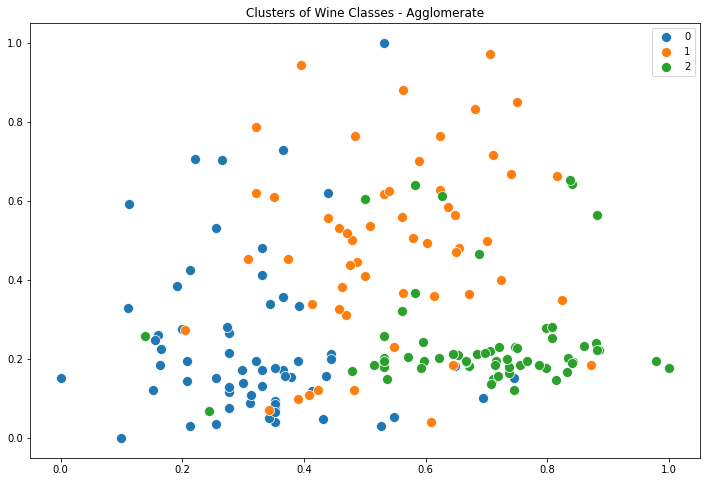

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(mod_X[clust_labels==0,0], mod_X[clust_labels==0,1], ax=ax, label="0", s=100)
sns.scatterplot(mod_X[clust_labels==1,0], mod_X[clust_labels==1,1], ax=ax, label="1", s=100)
sns.scatterplot(mod_X[clust_labels==2,0], mod_X[clust_labels==2,1], ax=ax, label="2", s=100)
ax.set_title("Clusters of Wine Classes - Agglomerate")
plt.show()